## Part A

Write MATLAB code that generates samples from this distribution. 

Plot the distribution of $r$ for a single draw of $x$ as a histogram (i.e., generate a single random
vector $x$ and use this to draw multiple samples of $r|x$ to generate the histogram). Try the same
with drawing different $x$ repeatedly.

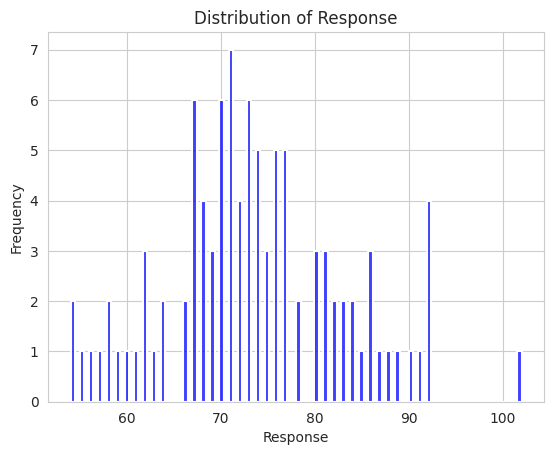

In [1]:
import seaborn as sns
from sthom215_problem_1_ex_2 import Neuron
import seaborn as sns

num_nerurons = 1
neuron = Neuron(100, mu=0, sigma=1)
# Simulate the neuron by using returned intesnity to simulate poisson spikes
resp = neuron.spiking()
import matplotlib.pyplot as plt

# Set the style and color palette
sns.despine()
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the histogram
sns.histplot(resp, bins=100, kde=False, color="b", edgecolor="w", linewidth=1.5)

# Add labels and title
plt.xlabel("Response")
plt.ylabel("Frequency")
plt.title("Distribution of Response")

# Show the plot
plt.show()


## Part B

Now generate a single response draw for each of M different stimuli $ x_m $, $ m = 1, ..., M $,
where M should be a parameter in your code that is easily adjustable. The response vector should
now be an $ M $ dimensional vector $ r $ ∈ $ \mathbb{R}^M $ with a corresponding matrix $ X = [x_1, ..., x_M] $ containing
all of your generated stimuli. Often in higher dimensional settings we linearize models, in this
case assuming that $ r \approx Xg $ with added independent, identically distributed (i.i.d.) Gaussian
noise. Set up a probabilistic relationship (likelihood) of $ r $ conditioned on $ g $ under a Gaussian
noise assumption. Specifically, assume that $ r = Xg + \epsilon $ where $ \epsilon $ is a mean-zero, Gaussian noise
vector with variance $ \sigma^2I $. Use the likelihood derived to set up a maximum likelihood inference of
$ g $ given the responses and stimuli (hint: think least-squares). 

In [6]:
import numpy as np
import numpy.linalg as la
from sthom215_problem_1_ex_2 import Neuron

num_nerurons = 200
n_trials = 100
neurons =  Neuron(num_nerurons, n_trials, mu=0, sigma=1)
resp_m = neurons.activity()
stimuli_m = neurons.stimuli

true_g = neurons.get_tuning_curve(neurons.n_trials)
r_noise = np.dot(stimuli_m , true_g) + np.random.normal(0, 0.1, resp_m.shape[0])
lsqr_g = la.lstsq(stimuli_m, r_noise, rcond=None)[0]

print("tuning curve: ", lsqr_g.shape)

tuning curve:  (100,)


In [3]:
ml_g = stimuli_m.mean(axis=0)

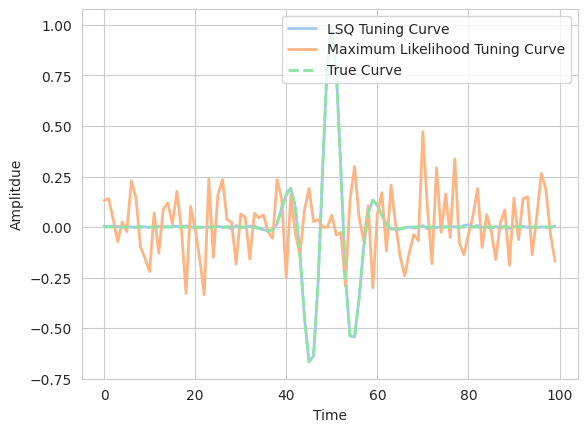

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

f1 = ax.plot(lsqr_g, linewidth=2.0, label="LSQ Tuning Curve")
f2 = ax.plot(ml_g, linewidth=2.0, label="Maximum Likelihood Tuning Curve")
f3 = ax.plot(true_g, linestyle = '--', linewidth=2.0, label="True Curve")

ax.legend()

ax.set_xlabel("Time")
ax.set_ylabel("Amplitdue")

plt.show()


### How close is the estimate of $g$ to the real $g$

It is very close in the least squares sense after linearization. 

## Part C
Now use the actual known likelihood (in this case) to estimate $ g $ by setting up an optimization program using likelihood defined above. You should focus on defining the minimization program and then using the fminunc function in MATLAB.
Infer the tuning curve using $ M = N $ samples. 
* How accurate are the curves? 

The curves for low $N$ are not very accurate.
The largest difference between the scale at 50 and 100 are the amplitude differences. 

* What about for $ M = 2N $? $ M = N/2 $? 

The fit for 2N is a near perfect fit while for N/2 the fit is very poor. 

* Plot the estimates from Part C and Part B together. What do you notice about the estimates as the number of samples gets large?

I notice that as the number of samples gets larger, the fit improves. However, the computational takes much longer to complete. 


In [4]:
import seaborn as sns
from sthom215_problem_1_ex_2 import optimization, objMLL

N = 100
num_neurons = [N//2, N, 2*N]
n_trials = 100
resultsMLList = []

for num_neuron in num_neurons:
    resultsML = optimization(objMLL, num_neuron, n_trials)
    resultsMLList.append(resultsML)


/home/skyler/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -491321.856823
         Iterations: 256
         Function evaluations: 37875
         Gradient evaluations: 375


/home/skyler/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -689547.967778
         Iterations: 1000
         Function evaluations: 114130
         Gradient evaluations: 1130
         Current function value: -980603.439199
         Iterations: 545
         Function evaluations: 62317
         Gradient evaluations: 617


/home/skyler/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


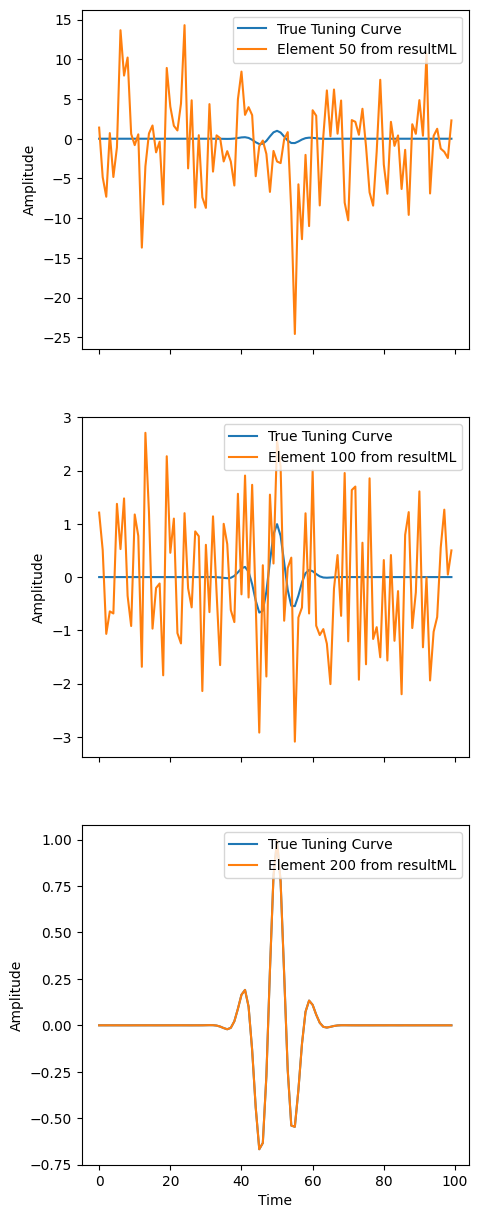

In [17]:
import matplotlib.pyplot as plt

num_neurons = [N//2, N, 2*N]

fig, axs = plt.subplots(3,1, figsize=(5, 15), sharex=True, sharey=False)

for i, element in enumerate(zip(resultsMLList, num_neurons)):
    line, num = element
    sns.lineplot(true_g, label='True Tuning Curve', ax = axs[i])
    sns.lineplot(line, label=f'Element {num} from resultML', ax = axs[i])
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend()


plt.show()

## Part D
Adding in priors: Now let’s add some prior knowledge about the tuning curve. For the
Gaussian case, add a Gaussian prior $ p(g) \sim \mathcal{N}(0, \sigma^2I) $. Recall that with priors we change from
a maximum likelihood to a maximum a-posteriori (MAP) estimation. Use the definition of the
MAP estimate and Bayes rule to derive the estimator.

In [12]:
from sthom215_problem_1_ex_2 import objPriorUnregularized, optimization

num_nerurons = 100
n_trials = 100

resultMAP = optimization(objPriorUnregularized, num_nerurons, n_trials)


         Current function value: -689544.597898
         Iterations: 1000
         Function evaluations: 111504
         Gradient evaluations: 1104


/home/skyler/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


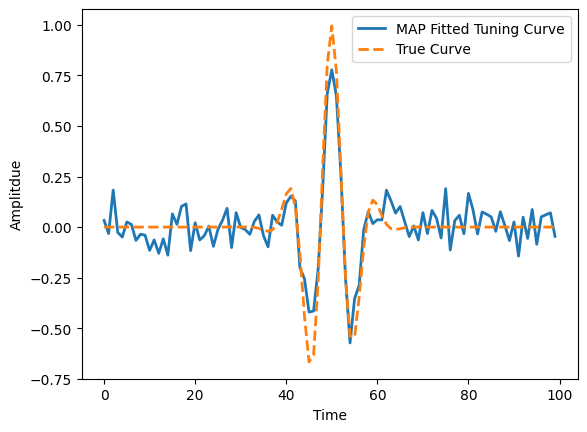

In [13]:
fig = plt.figure()
ax = fig.gca()


sns.lineplot(resultMAP, linewidth=2.0, label="MAP Fitted Tuning Curve", ax=ax)
sns.lineplot(true_g, linestyle = '--', linewidth=2.0, label="True Curve", ax=ax)
ax.set_xlabel("time")
ax.set_ylabel('ampltidue')

ax.legend()

ax.set_xlabel("Time")
ax.set_ylabel("Amplitdue")

plt.show()

### How does this change the optimization? 

The addition of the prior increases the computational time.

### How about the estimated tuning curve?

The addition of a prior makes the estimate more accurate for a smaller number of samples. 

### For the Poisson case, add a “smoothing” term $ p(\nabla g) \sim \mathcal{N}(0, \sigma^2I) $ (following the same procedure).

With the additional smoothing parameter by using the gradient we find that the minimization happens in fewer iterations compared to the case with the prior but without the regularization term.

In [ ]:
from sthom215_problem_1_ex_2 import objPriorRegularized, optimization

num_nerurons = 100
n_trials = 100

resultMAP = optimization(objPriorRegularized, num_nerurons, n_trials)

In [ ]:
import seaborn as sns
fig = plt.figure()
ax = fig.gca()


sns.lineplot(resultMAP, linewidth=2.0, label="MAP Fitted Tuning Curve", ax=ax)
sns.lineplot(true_g, linestyle = '--', linewidth=2.0, label="True Curve", ax=ax)
ax.set_xlabel("time")
ax.set_ylabel('ampltidue')

ax.legend()

ax.set_xlabel("Time")
ax.set_ylabel("Amplitdue")

plt.show()

### How does this affect the optimization? 

This makes the optimization converge faster.



### How about the estimated tuning curve?

It makes it look a little better.



# Part E Parameter regimes: 

Finally you should have code that generates a number of samples $M$
that probe an $ N $ dimensional receptive field. You should be able to change these parameters as well as the stimulus strength $ A $ (multiplier of $ X $) as well as the level of regularization (i.e., the variance of the prior $ \sigma $). Vary these parameters. 

* What happens at low signal levels? 
* How many samples do you need if $ A = 0.01 $? 
* Compare these observations with the histograms of the spike counts.

In [ ]:
from sthom215_problem_1_ex_2 import objPriorRegularized, optimization

num_nerurons = 100
n_trials = 100
A = 0.1
resultMAP = optimization(objPriorRegularized, num_nerurons, n_trials, stimulus_scale = A)

# Problem 2: Dimensionality Reduction

## Part A: Load the Data

Load the data from `sample_dat.mat`. Compute the peristimulus time histogram (PSTH) of the data. Plot the PSTHs and note any trends. Now pre-process the data by using a Gaussian Process (GP) prior to smooth the data. A GP prior smooths the data by creating a correlation structure that makes nearby points in time have similar values. Specifically, if we treat each neuron’s PSTH as $x_n$, which is a $T$-dimensional vector, the prior distribution is $x_n \sim N(0, K)$, where the covariance matrix $K$ is defined as $K_{ij} = A \cdot e^{-(t_i-t_j)^2/l}$. Use the same approach as Problem 1 to get an estimate of the smoothed PSTH per neuron.

In [1]:
from sthom215_problem_2_ex_2 import *
import numpy as np
data = load_mat('sample_dat')
# (trial, neuron, spikes_per_bin)
mat = np.stack(list(data.values()), axis=0)

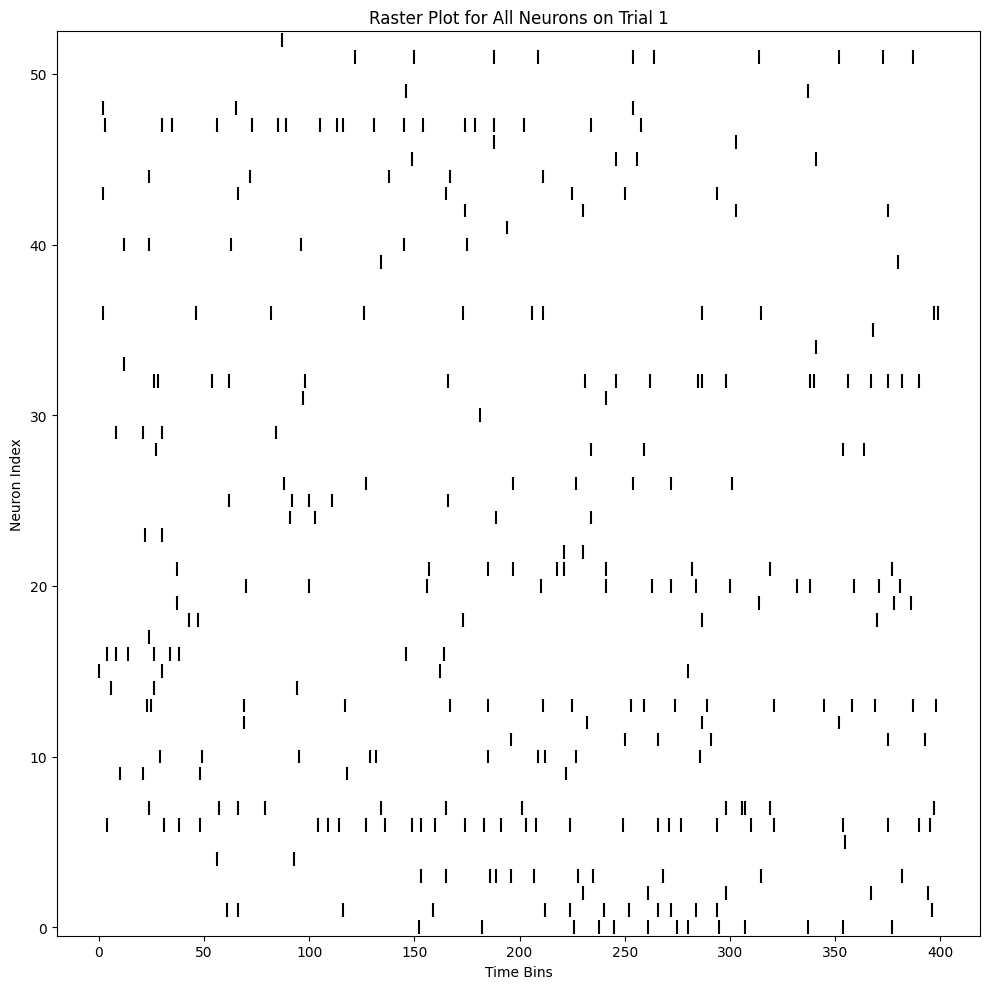

In [2]:
get_PSTH(1,dat=mat)

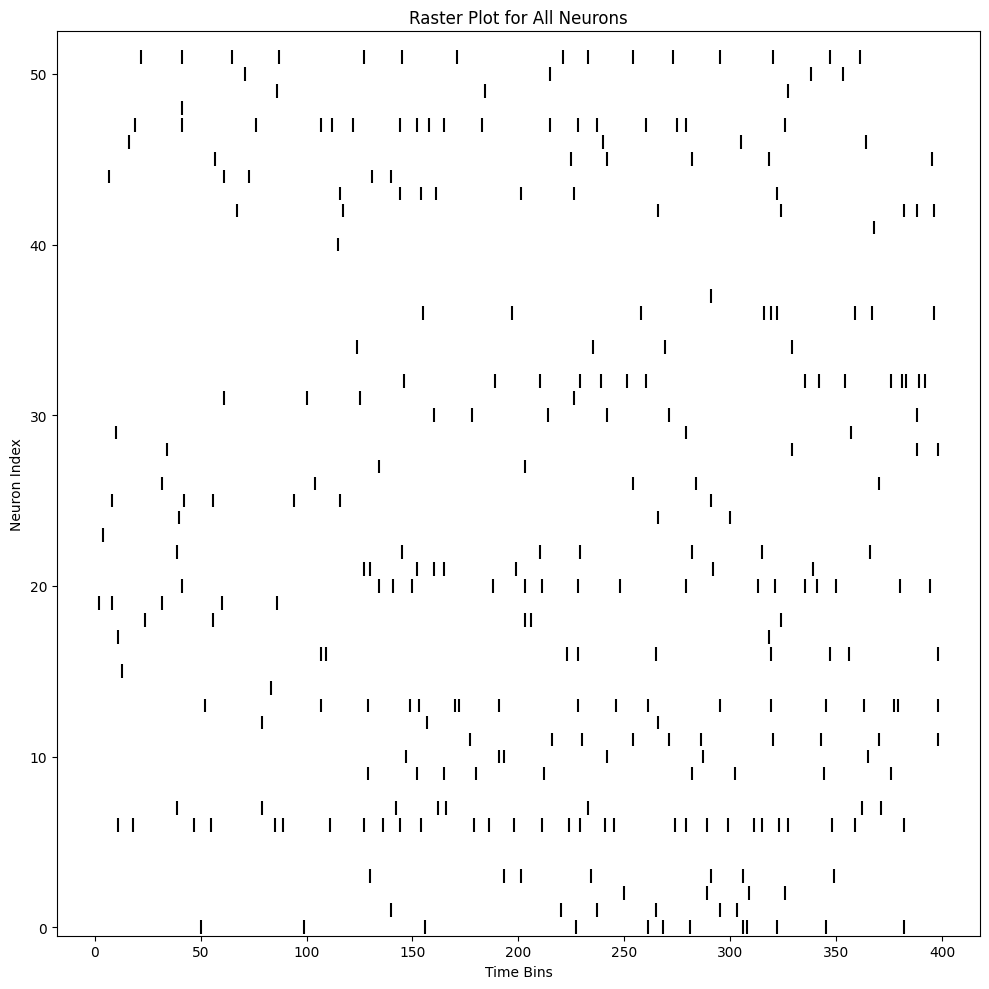

In [3]:
from sthom215_problem_2_ex_2 import smoothing
# test for single trial
trial1 = mat[0,:,:]
smooth_trial1 = smoothing(trial1, 1e-2, 1)
get_PSTH(dat=smooth_trial1)


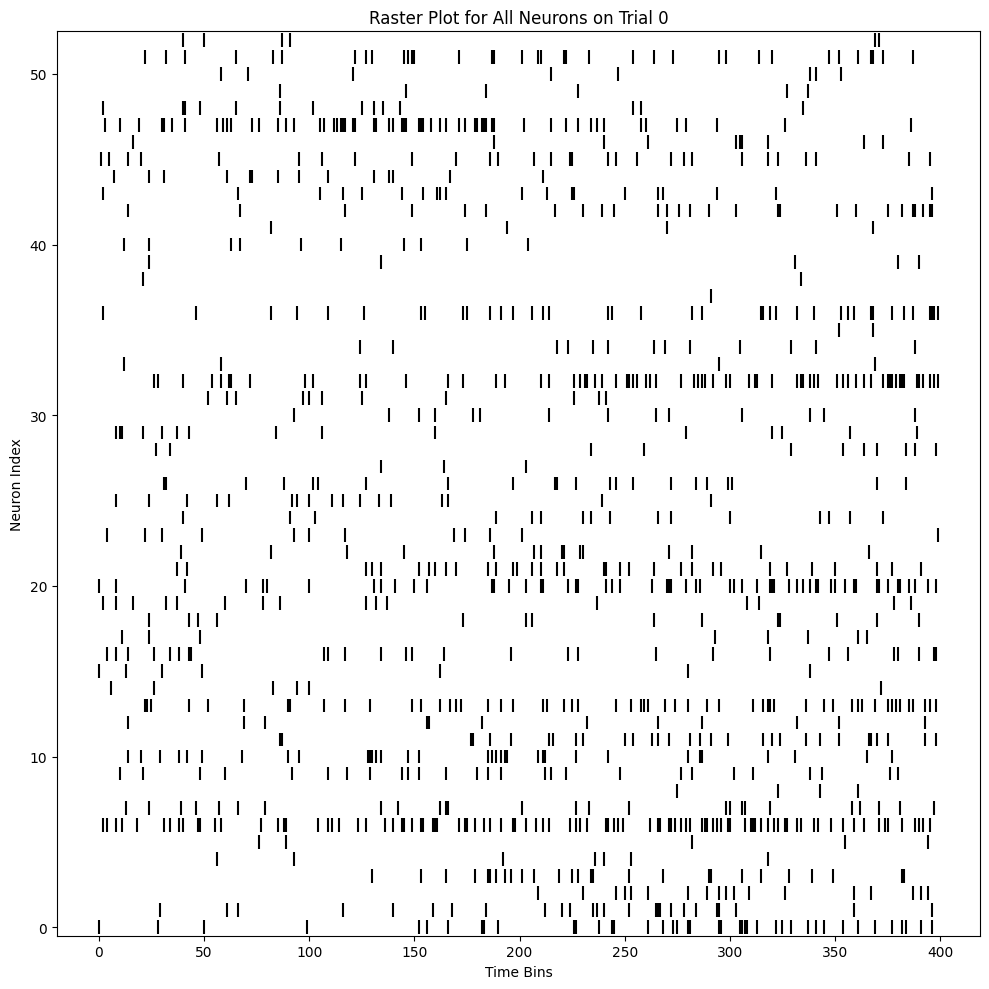

In [4]:
from sthom215_problem_2_ex_2 import smoothing
# smooth all trials
width  = 1e-1
smooth_mat = smoothing(mat, width, 1)
get_PSTH(0, dat=smooth_mat)

### Compare the two sets of PSTHs visually and remark on any details you notice. 



## Part B: Compute the Principal components

Compute the Principal components both with and without smoothing. Look at the temporal principal components. Specifically, plot (side-by-side) the top 3 components as a 3D line plot. 

* What do you notice?

After plotting the top 3 principle components side by side I notice that the plots look exactly the same. 


In [5]:
from sthom215_problem_2_ex_2 import pcaOverTime
import seaborn as sns
import matplotlib.pyplot as plt

trans_mat = pcaOverTime(mat)
trans_mat_smooth = pcaOverTime(smooth_mat)

plot_principal_components(3, trans_mat, trans_mat_smooth)


## Part C Look in the GPFA folder. 

Identify how to run GPFA by looking at the demo files included. Run GPFA on the data with a bin-size of 1ms (instead of the default 20ms). GPFA returs per-trial representations of neural activity. Use the function provided in the gpfa code directory plot3D to plot the time-courses for all of the trials. 

* What do you notice?

I notice that there is variablity across the trials as they are plotted but they all have the same basic shape and in particular, the initial trajectories appear to be rather similar. 

In [10]:
from sthom215_problem_2_ex_2 import *
from elephant.gpfa import GPFA
from neo import SpikeTrain
import quantities as pq
import numpy as np

# This should load your data
data = load_mat('sample_dat')  

# (trial, neuron, spikes_per_bin)
mat = np.stack(list(data.values()), axis=0)

bin_size = 1 * pq.ms
latent_dim = 3

spike_trains = create_SpikeTrain(mat)

# Initialize and fit GPFA
gpfa_3dim = GPFA(bin_size=bin_size, x_dim=latent_dim)
all_trajectories= gpfa_3dim.fit_transform(spike_trains)


Initializing parameters using factor analysis...

Fitting GPFA model...


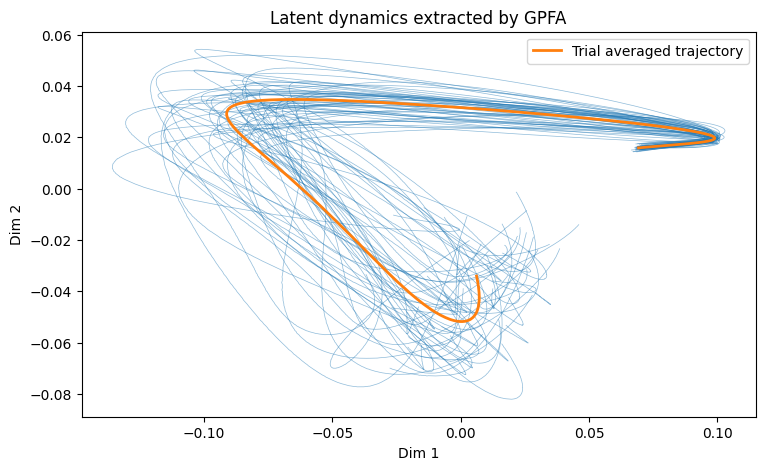

In [12]:
# Code from https://elephant.readthedocs.io/en/latest/tutorials/gpfa.html
linewidth_single_trial = 0.5
color_single_trial = 'C0'
alpha_single_trial = 0.5

linewidth_trial_average = 2
color_trial_average = 'C1'


f, ax1 = plt.subplots(1, 1, figsize=(15, 5))

ax1.set_title('Latent dynamics extracted by GPFA')
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')
ax1.set_aspect(1)
for single_trial_trajectory in all_trajectories:
    ax1.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-', lw=linewidth_single_trial, c=color_single_trial, alpha=alpha_single_trial)
average_trajectory = np.mean(all_trajectories, axis=0)
ax1.plot(average_trajectory[0], average_trajectory[1], '-', lw=linewidth_trial_average, c=color_trial_average, label='Trial averaged trajectory')
ax1.legend()

## Part D: Given trial-by-trial variability.
Given trial-by-trial variability,

* What do you think could be reasonable explanations for the observed deviations of the low-dimensional neural trajectory. 


* Pick one of these hypotheses and describe a theoretical way to test a prediction made by that hypothesis.

## Problem 3: Learning a data-driven Linear Dynamical System (LDS)

### Part A:
Find the data associated with the jPCA paper (included as `exampleData.mat`). Load up
the data, and read the `NOTES.pdf` file to identify which data matrix corresponds to “condition
27”. What do the values in this matrix represent? Plot the data as a heatmap.


The `Notes.pdf` says that "each of the 108 elements is one 'condition': one reach type that our monkey performed.' This means that these are neural recordings from  

In [ ]:
from sthom215_problem_3_ex_3 import *
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

pwd = Path().cwd()
fname = 'exampleData.mat'
fpath = pwd / fname
COND = 27

mat, time_steps = loadData(COND, fpath)


In [ ]:
sns.heatmap(mat, fmt=".2f", cbar=True)

# Set the axis labels
plt.xlabel("Time bin (10ms)")
plt.ylabel("Neuron")

# Set the title of the plot
plt.title(f"Mean firing rate of Monkey Neurons reaching under condition {COND}")

# Show the plot
plt.show()

### Part B 
In this problem we will set up the optimization to learn a linear system guiding a
population of neurons. For one dataset write out the probabilistic model corresponding to the
discrete approximation of $\frac{dx_t}{dt} = Ax_t + \epsilon$ where $\epsilon$ is independently identically distributed
Gaussian noise with zero mean and standard deviation $\sigma^2I$. For the discretization, use the simple
approximation to the differential: $\frac{dx_t}{dt} \approx \frac{x_t - x_{t-1}}{dt}$. 

So,

$$ \partial x =\frac{x_t - x_{t-1}}{\Delta} = Ax_t + \epsilon$$

where $x_t$ and $x_{t-1}$ matrices over time $[1,t]$ and $[0,t-1]$ respectively.


Choose $\Delta$ small.

Derive the ML as:

$$\mathcal{L}(A) = p(\partial x|A) = \prod_{i=1}^n\mathcal{N}(x_{ij};\mu, \sigma^2)$$
$$\sum_{i=1}^n-\log\mathcal{N}(x_{ij};\mu, \sigma^2)$$



$$\sum_{i=1}^n \frac{x_{ij}-\mu}{\sigma^2}$$

* Now what is the same solution when given $k$ datasets that all follow the same dynamics? (Hint: think about each dataset as independent: what’s an important property of independent random variables with respect to their probabilities?).

Since each dataset is independent then the solutions to each of the datasets are $k$ independent solutions. Since the dynamics are assumed to be Markovian each time sequence is only dependent on its previous. It follows that we can simply take the product of each of the marices entry wise assuming that each element in the matrix is a probability. Through the log, this becomes a sum of each of their solutions up to some scaling of the contributions of each. This maintains the Markov assumption as well.


The derived likelihood represents $P(x|A)$. Use this to set up a ML estimate of
$A$. 

Code up in MATLAB the solution you derived and run on the jPCA dataset. Reconstruct
the data by taking each $x_t$ and predicting $x_{t+1}$ by taking one step given the dynamical system
you found (via the discrete equation you derived above). Compute the reconstruction error of
the data (norm of the difference between the estimated $x_{t+1}$ and the real $x_{t+1}$), and plot the
histogram of these errors across all time-points.

In [1]:
# run system forward one step
from sthom215_problem_3_ex_3 import *
from pathlib import Path
import numpy as np 
import numpy.linalg as la

pwd = Path().cwd()
fname = 'exampleData.mat'
fpath = pwd / fname

bin = 1

COND = 27
mat27, time_bins = loadData(COND, fpath)
# beginning changes in the system
x0, x1 = get_delayed_matrices(mat27)
dx = x1 - x0

In [18]:
A_lstsq = np.linalg.lstsq(x0.T, dx.T, rcond=None)[0]

In [19]:
from scipy.optimize import minimize 

def obj(A, x0, dx, gamma=0.01):
    _A = A.reshape(218,218)
    return la.norm(dx - _A @ x0, ord='fro') + gamma * la.norm(_A, ord='fro')
    

initA = np.random.randn(218,218)

results = minimize(obj, x0=initA.flatten(),  args=(x1, dx),
                   method='L-BFGS-b', 
                   options={'disp':True, 'maxiter':1000})

finalA = results.x.reshape(218,218)

KeyboardInterrupt: 

In [20]:
x1recon = finalA @ x0
x1reconlstsq = A_lstsq @ x0

In [21]:
recon_error = la.norm(x1recon - x1, ord='fro')
recon_error_lstsq = la.norm(x1reconlstsq - x1, ord='fro')
print(f'the reconstruction error is {recon_error}')
print(f'the reconstruction error using lstsq is {recon_error_lstsq}')

the reconstruction error is 13723.431606662261
the reconstruction error using lstsq is 14174.480519040679


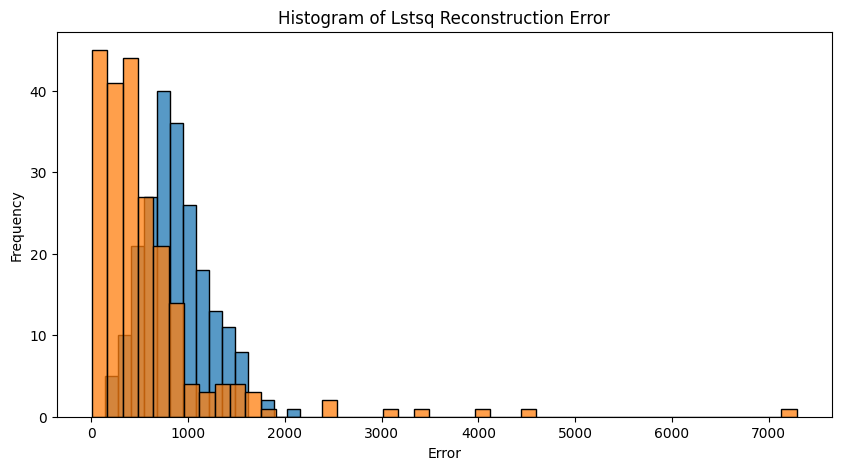

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the first plot
plt.figure(figsize=(10, 5))
sns.histplot(la.norm(x1recon - x1, ord=2, axis=1), label='BFGS')
plt.title('Histogram of BFGS Reconstruction Error')
plt.xlabel('Error')
plt.ylabel('Frequency')

sns.histplot(la.norm(x1reconlstsq - x1, ord=2, axis=1), label='Lstsq')
plt.title('Histogram of Lstsq Reconstruction Error')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.show()

## Part C
Repeat part B but consider only the top 6 principal components of each matrix $X$.
REMEMBER: PCA projection includes a mean subtraction step! This is very important in projecting the data! Compute again the reconstruction error of the data given the learned dynamical system (with a one-step prediction), and plot the histogram of errors.


In [28]:
from sklearn.decomposition import PCA

num_components = 6
pca = PCA(n_components=num_components)
fit_mat = pca.fit_transform(mat27)

In [29]:
fit_mat.shape

(218, 6)

## Part D
The learned dynamics should provide a projection of the data onto a given space. Take
one of the first 6 datapoints in each dataset in the jPCA datasets, and use the learned dynamics
from Part C to extrapolate the neural system forward in time. Plot the first two dynamical
principal dimensions of the projection: how do they look?


## Part E
Now run the jPCA algorithm on the same data. Look at the code and notes provided
by the authors and find the right lines of code to run on the dataset. Find the learned dynamics
and project the data forward as with Part D. Use “subplot” to plot the projected neural activity
next to each other. What key differences do you see between the dynamics? What differences
between the dynamical system matrices do you see? Are there similarities or differences e.g., in
the eigenspectra?

